In [193]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [194]:
## Read csv file
df = pd.read_csv('train_all_tasks.csv')

## Data pre-processing

In [196]:
# text and labels for task A
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(df['text'], df['label_sexist'], test_size=0.3, random_state=0)
X_test_a, X_dev_a, y_test_a, y_dev_a = train_test_split(X_test_a, y_test_a, test_size=0.33)

# text and labels for task B
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(df['text'], df['label_category'], test_size=0.3, random_state=0)
X_test_b, X_dev_b, y_test_b, y_dev_b = train_test_split(X_test_b, y_test_b, test_size=0.33)

X_train_b2, X_test_b2, y_train_b2, y_test_b2 = train_test_split(df[df['label_sexist'] == 'sexist']['text'],
                                                                df[df['label_sexist'] == 'sexist']['label_category'],
                                                                test_size=0.3,
                                                                random_state=0)
X_test_b2, X_dev_b2, y_test_b2, y_dev_b2 = train_test_split(X_test_b2, y_test_b2, test_size=0.33)

In [197]:
print(Counter(y_train_a))
print(Counter(y_dev_a))
print(Counter(y_test_a))
print("")
print(Counter(y_train_b))
print(Counter(y_dev_b))
print(Counter(y_test_b))
print("")
print(Counter(y_train_b2))
print(Counter(y_dev_b2))
print(Counter(y_test_b2))

Counter({'not sexist': 7413, 'sexist': 2387})
Counter({'not sexist': 1064, 'sexist': 322})
Counter({'not sexist': 2125, 'sexist': 689})

Counter({'none': 7413, '2. derogation': 1119, '3. animosity': 808, '4. prejudiced discussions': 236, '1. threats, plans to harm and incitement': 224})
Counter({'none': 1038, '2. derogation': 151, '3. animosity': 122, '4. prejudiced discussions': 41, '1. threats, plans to harm and incitement': 34})
Counter({'none': 2151, '2. derogation': 320, '3. animosity': 235, '4. prejudiced discussions': 56, '1. threats, plans to harm and incitement': 52})

Counter({'2. derogation': 1107, '3. animosity': 812, '1. threats, plans to harm and incitement': 231, '4. prejudiced discussions': 228})
Counter({'2. derogation': 167, '3. animosity': 112, '4. prejudiced discussions': 39, '1. threats, plans to harm and incitement': 19})
Counter({'2. derogation': 316, '3. animosity': 241, '4. prejudiced discussions': 66, '1. threats, plans to harm and incitement': 60})


In [198]:
def confmatrix_display(confmatrix, model_name, task_name):
    plt.rcParams.update({'font.size': 12})
    plt.figure(dpi=1200)

    if task_name == 'taskA':
        labels = df['label_sexist'].unique() 
    elif task_name == 'taskB':
        labels = df['label_category'].sort_values().unique()
    else:
        labels = df[df['label_sexist'] == 'sexist']['label_category'].sort_values().unique()

    cm_display = ConfusionMatrixDisplay(confmatrix, display_labels=labels).plot()
    # cm_display = ConfusionMatrixDisplay(confmatrix).plot()
    
    if task_name != 'taskA':
        plt.xticks(rotation=45, ha='right')

In [199]:
def report(model_name, ydev, pred, task_name, zero_division=1):
    conf_matrix = confusion_matrix(ydev, pred)
    print("\n=== {0} ===\n\nClassification Report:\n{1}"
          "\nConfusion Matrix:\n{2}".format(model_name,
                                            classification_report(ydev, pred, 
                                                                  zero_division=zero_division),
                                            confusion_matrix(ydev, pred)))

    confmatrix_display(conf_matrix, model_name, task_name)

In [200]:
def naive_bayes(xtrain, ytrain, xdev, ydev, le, task_name):
  model_name = "naive bayes"
  model = MultinomialNB()
  vec = CountVectorizer()

  vec.fit(xtrain, xdev)
  xtrain_enc = vec.transform(xtrain)
  xdev_enc = vec.transform(xdev)

  model.fit(xtrain_enc, ytrain)
  pred = model.predict(xdev_enc)
  pred = le.inverse_transform(pred)

  report(model_name, ydev, pred, task_name)

In [201]:
def svm_train(xtrain, ytrain, xdev, ydev, le, task_name):
  model_name = "SVM"
  model = SVC(kernel='linear')
  vec = CountVectorizer()

  vec.fit(xtrain, xdev)
  xtrain_enc = vec.transform(xtrain)
  xdev_enc = vec.transform(xdev)

  model.fit(xtrain_enc, ytrain)
  pred = model.predict(xdev_enc)
  pred = le.inverse_transform(pred)

  report(model_name, ydev, pred, task_name)

In [202]:
def majority_class(xtrain, ytrain, xdev, ydev, le, task_name):
  model_name = "majority class"
  model = DummyClassifier()
  vec = CountVectorizer()

  vec.fit(xtrain, xdev)
  xtrain_enc = vec.transform(xtrain)
  xdev_enc = vec.transform(xdev)

  model.fit(xtrain_enc, ytrain)
  pred = model.predict(xdev_enc)
  pred = le.inverse_transform(pred)

  report(model_name, ydev, pred, task_name, zero_division=0)

In [203]:
def decision_tree_train(xtrain, ytrain, xdev, ydev, le, task_name):
  model_name = "decision tree"
  model = DecisionTreeClassifier()
  vec = CountVectorizer()

  vec.fit(xtrain, xdev)
  xtrain_enc = vec.transform(xtrain)
  xdev_enc = vec.transform(xdev)

  model.fit(xtrain_enc, ytrain)
  pred = model.predict(xdev_enc)
  pred = le.inverse_transform(pred)

  report(model_name, ydev, pred, task_name)

## Running Task A (Binary) 

In [205]:
task_name = 'taskA'
le = LabelEncoder()

le.fit(y_train_a)
y_train_a = le.transform(y_train_a)


=== naive bayes ===

Classification Report:
              precision    recall  f1-score   support

  not sexist       0.82      0.95      0.88      2125
      sexist       0.70      0.34      0.46       689

    accuracy                           0.80      2814
   macro avg       0.76      0.65      0.67      2814
weighted avg       0.79      0.80      0.78      2814

Confusion Matrix:
[[2027   98]
 [ 456  233]]


<Figure size 7200x4800 with 0 Axes>

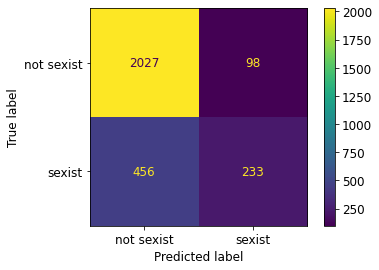

In [206]:
naive_bayes(X_train_a, y_train_a, X_test_a, y_test_a, le, task_name)


=== majority class ===

Classification Report:
              precision    recall  f1-score   support

  not sexist       0.76      1.00      0.86      2125
      sexist       0.00      0.00      0.00       689

    accuracy                           0.76      2814
   macro avg       0.38      0.50      0.43      2814
weighted avg       0.57      0.76      0.65      2814

Confusion Matrix:
[[2125    0]
 [ 689    0]]


<Figure size 7200x4800 with 0 Axes>

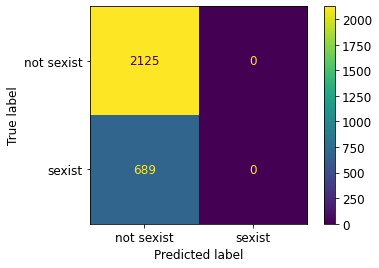

In [207]:
majority_class(X_train_a, y_train_a, X_test_a, y_test_a, le, task_name)


=== SVM ===

Classification Report:
              precision    recall  f1-score   support

  not sexist       0.86      0.90      0.88      2125
      sexist       0.64      0.54      0.58       689

    accuracy                           0.81      2814
   macro avg       0.75      0.72      0.73      2814
weighted avg       0.80      0.81      0.81      2814

Confusion Matrix:
[[1913  212]
 [ 320  369]]


<Figure size 7200x4800 with 0 Axes>

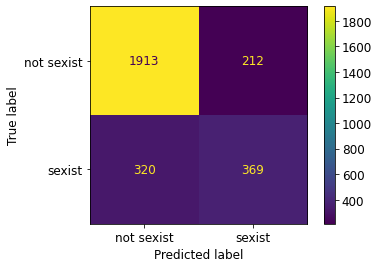

In [208]:
svm_train(X_train_a, y_train_a, X_test_a, y_test_a, le, task_name)


=== decision tree ===

Classification Report:
              precision    recall  f1-score   support

  not sexist       0.85      0.88      0.86      2125
      sexist       0.58      0.52      0.55       689

    accuracy                           0.79      2814
   macro avg       0.72      0.70      0.71      2814
weighted avg       0.78      0.79      0.79      2814

Confusion Matrix:
[[1871  254]
 [ 334  355]]


<Figure size 7200x4800 with 0 Axes>

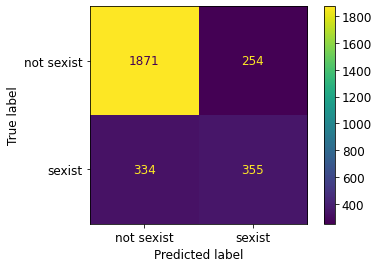

In [209]:
decision_tree_train(X_train_a, y_train_a, X_test_a, y_test_a, le, task_name)

## Running Task B (Multi-class) 

In [211]:
task_name = 'taskB'

le.fit(y_train_b)
y_train_b = le.transform(y_train_b)


=== naive bayes ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.00      0.00      0.00        52
                           2. derogation       0.50      0.11      0.18       320
                            3. animosity       0.10      0.00      0.01       235
               4. prejudiced discussions       1.00      0.00      0.00        56
                                    none       0.78      0.99      0.87      2151

                                accuracy                           0.77      2814
                               macro avg       0.48      0.22      0.21      2814
                            weighted avg       0.68      0.77      0.69      2814

Confusion Matrix:
[[   0    2    0    0   50]
 [   0   35    5    0  280]
 [   0   21    1    0  213]
 [   0    0    0    0   56]
 [   1   12    4    0 2134]]


<Figure size 7200x4800 with 0 Axes>

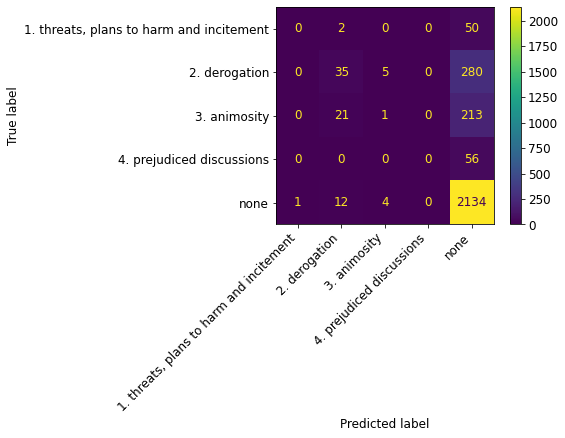

In [212]:
naive_bayes(X_train_b, y_train_b, X_test_b, y_test_b, le, task_name)


=== majority class ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.00      0.00      0.00        52
                           2. derogation       0.00      0.00      0.00       320
                            3. animosity       0.00      0.00      0.00       235
               4. prejudiced discussions       0.00      0.00      0.00        56
                                    none       0.76      1.00      0.87      2151

                                accuracy                           0.76      2814
                               macro avg       0.15      0.20      0.17      2814
                            weighted avg       0.58      0.76      0.66      2814

Confusion Matrix:
[[   0    0    0    0   52]
 [   0    0    0    0  320]
 [   0    0    0    0  235]
 [   0    0    0    0   56]
 [   0    0    0    0 2151]]


<Figure size 7200x4800 with 0 Axes>

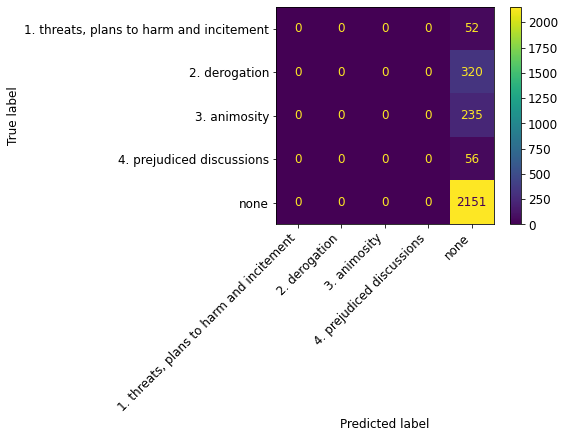

In [213]:
majority_class(X_train_b, y_train_b, X_test_b, y_test_b, le, task_name)


=== SVM ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.15      0.13      0.14        52
                           2. derogation       0.35      0.34      0.35       320
                            3. animosity       0.37      0.28      0.32       235
               4. prejudiced discussions       0.24      0.20      0.22        56
                                    none       0.86      0.89      0.87      2151

                                accuracy                           0.75      2814
                               macro avg       0.39      0.37      0.38      2814
                            weighted avg       0.73      0.75      0.74      2814

Confusion Matrix:
[[   7    6    3    2   34]
 [   9  110   47    7  147]
 [   8   60   66    6   95]
 [   0    4    1   11   40]
 [  24  130   63   19 1915]]


<Figure size 7200x4800 with 0 Axes>

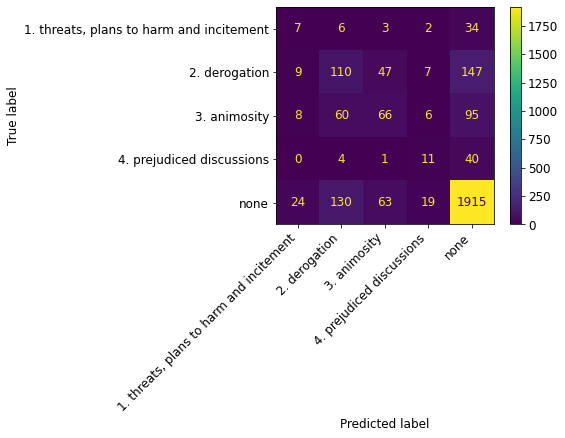

In [214]:
svm_train(X_train_b, y_train_b, X_test_b, y_test_b, le, task_name)


=== decision tree ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.03      0.02      0.02        52
                           2. derogation       0.36      0.30      0.32       320
                            3. animosity       0.36      0.31      0.33       235
               4. prejudiced discussions       0.12      0.07      0.09        56
                                    none       0.85      0.90      0.88      2151

                                accuracy                           0.75      2814
                               macro avg       0.34      0.32      0.33      2814
                            weighted avg       0.72      0.75      0.74      2814

Confusion Matrix:
[[   1    7    8    0   36]
 [   3   95   58    5  159]
 [   4   48   72    4  107]
 [   0   10    7    4   35]
 [  27  106   55   21 1942]]


<Figure size 7200x4800 with 0 Axes>

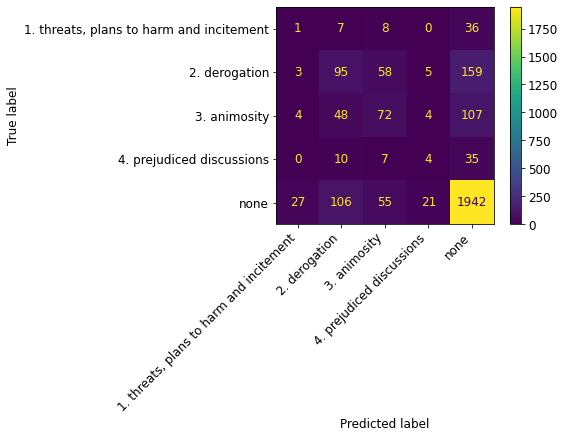

In [215]:
decision_tree_train(X_train_b, y_train_b, X_test_b, y_test_b, le, task_name)

## Running Task B version 2 (Multi-class, without a none class) 

In [217]:
task_name = 'taskB2'

le.fit(y_train_b2)
y_train_b2 = le.transform(y_train_b2)


=== naive bayes ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.86      0.10      0.18        60
                           2. derogation       0.50      0.83      0.63       316
                            3. animosity       0.47      0.30      0.37       241
               4. prejudiced discussions       0.75      0.05      0.09        66

                                accuracy                           0.50       683
                               macro avg       0.65      0.32      0.31       683
                            weighted avg       0.55      0.50      0.44       683

Confusion Matrix:
[[  6  41  13   0]
 [  1 262  52   1]
 [  0 169  72   0]
 [  0  47  16   3]]


<Figure size 7200x4800 with 0 Axes>

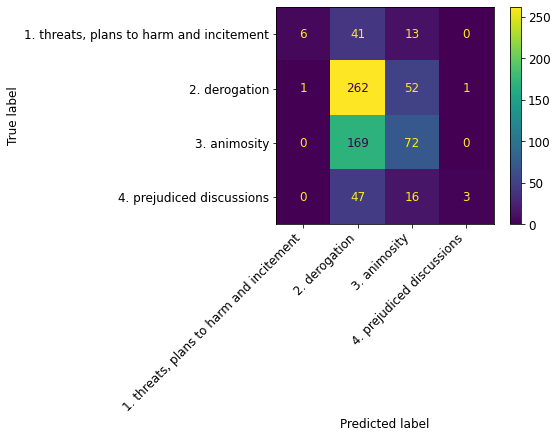

In [218]:
naive_bayes(X_train_b2, y_train_b2, X_test_b2, y_test_b2, le, task_name)


=== majority class ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.00      0.00      0.00        60
                           2. derogation       0.46      1.00      0.63       316
                            3. animosity       0.00      0.00      0.00       241
               4. prejudiced discussions       0.00      0.00      0.00        66

                                accuracy                           0.46       683
                               macro avg       0.12      0.25      0.16       683
                            weighted avg       0.21      0.46      0.29       683

Confusion Matrix:
[[  0  60   0   0]
 [  0 316   0   0]
 [  0 241   0   0]
 [  0  66   0   0]]


<Figure size 7200x4800 with 0 Axes>

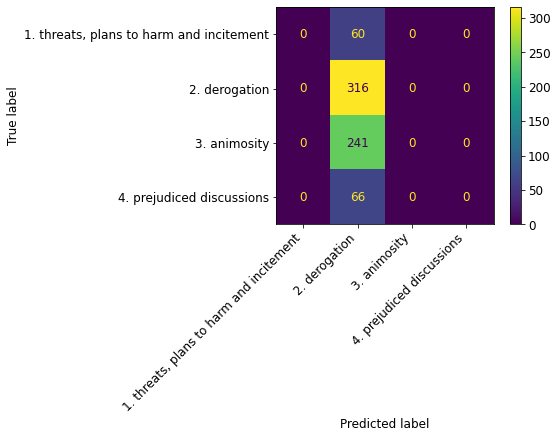

In [219]:
majority_class(X_train_b2, y_train_b2, X_test_b2, y_test_b2, le, task_name)


=== SVM ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.39      0.52      0.45        60
                           2. derogation       0.55      0.58      0.56       316
                            3. animosity       0.46      0.43      0.44       241
               4. prejudiced discussions       0.23      0.14      0.17        66

                                accuracy                           0.48       683
                               macro avg       0.41      0.42      0.41       683
                            weighted avg       0.47      0.48      0.47       683

Confusion Matrix:
[[ 31  13  11   5]
 [ 29 184  90  13]
 [ 15 110 104  12]
 [  4  30  23   9]]


<Figure size 7200x4800 with 0 Axes>

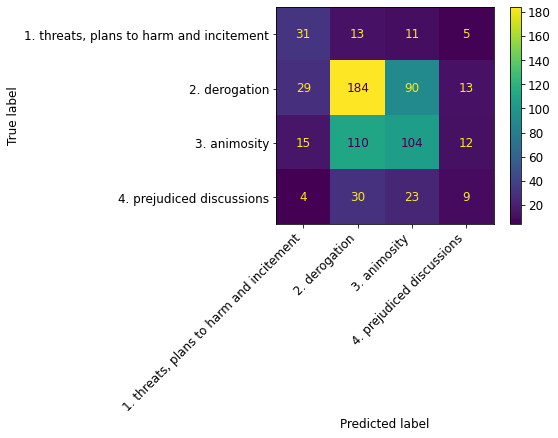

In [220]:
svm_train(X_train_b2, y_train_b2, X_test_b2, y_test_b2, le, task_name)


=== decision tree ===

Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.37      0.35      0.36        60
                           2. derogation       0.50      0.55      0.52       316
                            3. animosity       0.43      0.41      0.42       241
               4. prejudiced discussions       0.24      0.18      0.21        66

                                accuracy                           0.45       683
                               macro avg       0.39      0.37      0.38       683
                            weighted avg       0.44      0.45      0.44       683

Confusion Matrix:
[[ 21  17  14   8]
 [ 19 174 103  20]
 [ 13 119  99  10]
 [  4  38  12  12]]


<Figure size 7200x4800 with 0 Axes>

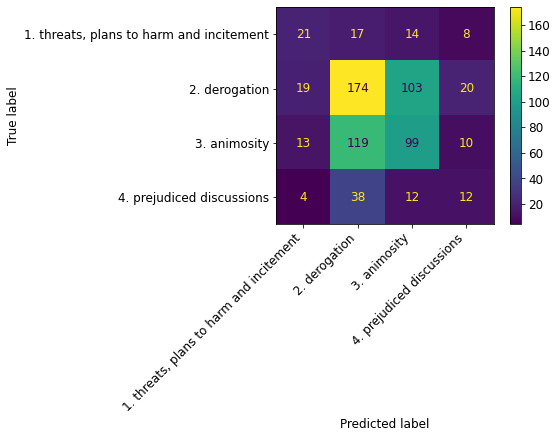

In [221]:
decision_tree_train(X_train_b2, y_train_b2, X_test_b2, y_test_b2, le, task_name)